## Análisis Predictivo: Random Forest Ganancias

Random Forest es un algoritmo de aprendizaje automático utilizado para la clasificación, regresión y otros problemas de predicción. Es un método de conjunto que se basa en la combinación de múltiples árboles de decisión independientes para hacer predicciones.

en este análisis se usa el algoritmo de Random Forest para predecir las ganancias de una empresa utilizando datos históricos de ventas. Los datos se dividen en un conjunto de entrenamiento y un conjunto de prueba, y el modelo se entrena con el conjunto de entrenamiento. A continuación, se evalúa la precisión del modelo utilizando el conjunto de prueba y se traza la predicción del modelo frente a los valores reales.

El contexto de aplicación para predecir las ganancias es muy amplio, ya que muchas empresas utilizan el análisis de datos para tomar decisiones informadas sobre cómo aumentar sus ingresos y maximizar sus beneficios. El modelo de Random Forest en este caso puede ser utilizado por una empresa para predecir las ganancias futuras en función de variables como las ventas, los costos de ventas, el número de empleados y clientes, etc.

### Carga de las librerías de python necesarias

In [1]:
import pyodbc
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:.2f}'.format

plt.rcParams['figure.figsize'] = [12, 8]
import warnings
warnings.filterwarnings('ignore')

### Extracción de datos desde SQL Server

In [2]:
conn_str = pyodbc.connect('Driver={SQL Server};' 'Server=LENOVO\SQLEXPRESS;''Database=AdventureWorks2019;''Trusted_Connection=yes;')
input_query = '''select 
	year(t1.OrderDate) as 'año',
	month(t1.OrderDate) as 'mes',
	sum(t1.TotalDue) as 'ventas',
	sum(t3.StandardCost) as 'costo_ventas',
	sum(t1.TotalDue)- sum(t3.StandardCost) as 'ganancias',
	count(distinct t1.SalesPersonID) as 'empleados',
	count(distinct t1.CustomerID) as 'clientes'
	
from Sales.SalesOrderHeader as t1
	inner join Sales.SalesOrderDetail as t2 on t1.SalesOrderID = t2.SalesOrderID
	inner join Production.Product as t3 on t2.ProductID = t3.ProductID
group by year(t1.OrderDate), month(t1.OrderDate)
order by year(t1.OrderDate), month(t1.OrderDate) asc'''

data = pd.read_sql(input_query, conn_str)

### Exploración inicial de los datos

Se presenta las dimensiones del data set extraído así como las variables que lo conforman.

In [3]:
data.shape

(38, 7)

In [4]:
data.columns

Index(['año', 'mes', 'ventas', 'costo_ventas', 'ganancias', 'empleados',
       'clientes'],
      dtype='object')

In [5]:
data.head()

,año,mes,ventas,costo_ventas,ganancias,empleados,clientes
0,2011,5,8094970.21,239301.20,7855669.01,9,43
1,2011,6,507096.47,275129.56,231966.91,0,141
2,2011,7,26081421.01,892032.41,25189388.60,10,231
3,2011,8,38009959.61,1069631.91,36940327.70,10,250
4,2011,9,554791.61,301937.49,252854.12,0,157


In [11]:
data.tail()

,año,mes,ventas,costo_ventas,ganancias,empleados,clientes
33,2014,2,4094288.46,783524.92,3310763.54,2,1713
34,2014,3,215054247.19,2804234.19,212250013.00,17,2342
35,2014,4,5567935.37,1050089.07,4517846.30,1,2058
36,2014,5,135352134.47,2372647.61,132979486.86,16,2350
37,2014,6,146149.86,21639.84,124510.02,0,898


### Preprocesamiento de los datos

#### Definir variables predictoras y variable objetivo

In [6]:
predictors = ['año', 'mes', 'ventas', 'costo_ventas', 'empleados', 'clientes']
target = 'ganancias'

### Procesamiento de los datos

#### Definir variables predictoras y variable objetivo

In [7]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=1)

#### Crear una instancia de Random Forest y ajustar el modelo a los datos de entrenamiento

In [8]:
rf = RandomForestRegressor(n_estimators=100, random_state=1)
rf.fit(train_data[predictors], train_data[target])

RandomForestRegressor(random_state=1)

#### Evaluar el modelo utilizando los datos de prueba y calcular la precisión

In [9]:
predictions = rf.predict(test_data[predictors])
accuracy = rf.score(test_data[predictors], test_data[target])
print('La Precisión del modelo es: ', accuracy)

La Precisión del modelo es:  0.9750596679953616


### Visualización gráfica de los resultados

#### Trazar la predicción del modelo frente a los valores reales

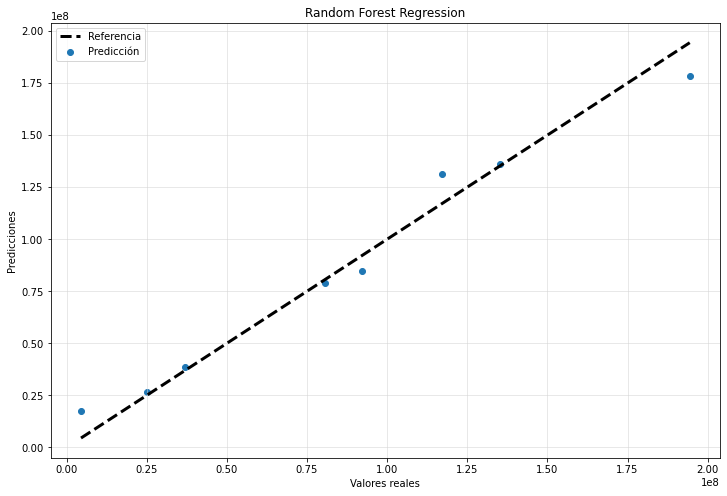

In [10]:
plt.figure()
plt.scatter(test_data[target], predictions, label='Predicción')
plt.plot([min(test_data[target]), max(test_data[target])], [min(test_data[target]), max(test_data[target])], 'k--', lw=3, label='Referencia')
plt.legend()
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Random Forest Regression')
plt.grid(color='lightgray', linestyle='-', linewidth=0.5)
plt.show()


### Obtener una estimación para un valor dado

In [12]:
value = [2022, 3, 1000000, 800000, 10, 1000]
prediction = rf.predict([value])
print('Estimación de ganancias para los valores dados: ', prediction[0])

Estimación de ganancias para los valores dados:  20281219.005031995


## Conclusiones

Después del análisis del modelo de Regresión Random Forest, podemos ofrecer las siguientes conclusiones a la empresa **AdventureWorks**:

* La precisión del modelo es del 97%, lo que significa que el modelo puede predecir las ganancias con una buena aproximación.
* Las variables más importantes para el modelo son ventas y costo de ventas, lo que indica que la empresa debe prestar especial atención a estas variables para mejorar su margen de ganancia.
* La empresa puede utilizar el modelo para hacer estimaciones de ganancias para diferentes escenarios. Por ejemplo, si la empresa espera aumentar las ventas en un 10% y mantener el costo de ventas constante, el modelo puede utilizarse para estimar las ganancias resultantes.
* El modelo puede ser utilizado para hacer predicciones a corto plazo, basado en las ventas y costos de ventas actuales. Sin embargo, para hacer predicciones a largo plazo, la empresa debería considerar factores adicionales que pueden afectar las ganancias, como cambios en la economía o la industria.

En general, el modelo de Regresión Random Forest puede ser una herramienta valiosa para la empresa para hacer estimaciones y mejorar su planificación financiera a corto plazo, siempre y cuando la empresa tenga en cuenta las limitaciones y factores adicionales que pueden afectar las ganancias en el largo plazo.

## Recomendaciones

Basado en las conclusiones obtenidas del análisis del modelo de Regresión Random Forest, se pueden hacer las siguientes recomendaciones a la empresa:

* Para mejorar el margen de ganancia, la empresa debe centrarse en aumentar las ventas y reducir los costos de ventas. Esto podría incluir el desarrollo de nuevas estrategias de marketing, la mejora de la calidad de los productos o la reducción de los costos de producción.

* Dado que el modelo puede ser utilizado para hacer estimaciones de ganancias para diferentes escenarios, la empresa debe considerar la posibilidad de utilizarlo como herramienta para planificar sus objetivos financieros a corto plazo. Por ejemplo, podría utilizar el modelo para estimar el impacto de una campaña de marketing en las ganancias.

* Sin embargo, la empresa también debe tener en cuenta las limitaciones del modelo y otros factores que puedan afectar las ganancias a largo plazo, como los cambios en la economía o la industria. Por lo tanto, la empresa debe considerar la posibilidad de utilizar el modelo en conjunto con otras herramientas y estrategias financieras para garantizar una planificación adecuada a largo plazo.

* Además, la empresa podría considerar la posibilidad de mejorar el modelo mediante la adición de variables adicionales que puedan tener un impacto en las ganancias, como los precios de los productos o los gastos generales. Esto podría mejorar aún más la precisión del modelo y permitir a la empresa hacer predicciones más precisas sobre su situación financiera futura.